In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./Resources/space_missions.csv", encoding='ISO-8859-1')
data.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [4]:
# convert date column to datetime data type
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
# remove comma from 'Price' column
data['Price'] = data['Price'].str.replace(',', '')

# convert the 'Price' column to a numeric dtype
data['Price'] = data['Price'].astype(float)

In [6]:
# Check for missing values
data.isnull().sum()

Company             0
Location            0
Date                0
Time              127
Rocket              0
Mission             0
RocketStatus        0
Price            3365
MissionStatus       0
dtype: int64

In [7]:
# since the majority of the data is missing price we will make a copy of the dataset and drop the entire attribute

# copy the dataset to a new df
df = data.copy()

# drop the price column
df = df.drop(columns="Price")
df.head()


,Company,Location,Date,Time,Rocket,Mission,RocketStatus,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,Failure


In [8]:
# now we will drop the null values with missing time
df.dropna(inplace=True)

In [9]:
# Check for duplicated rows
df.duplicated().sum()

1

In [10]:
# drop duplicated rows
df = df.drop_duplicates()

# Analyze the success rate of rocket launches for different companies

In [11]:
# Calculate the total number of launches for each company
launch_count = df['Company'].value_counts()

In [12]:
# Calculate the success rate for each company
success_rate = df.groupby('Company')['MissionStatus'].apply(lambda x: (x == 'Success').sum() / len(x))

In [13]:
# Combine the launch count and success rate into a single DataFrame
analysis = pd.concat([launch_count, success_rate], axis=1)
analysis.columns = ['Launch Count', 'Success Rate']
analysis.index.name = 'Company'

# Sort the DataFrame by launch count in descending order
analysis = analysis.sort_values(by='Launch Count', ascending=False)

# Display the analysis
analysis.head(60)

,Launch Count,Success Rate
Company,,
RVSN USSR,1717,0.910891
CASC,335,0.943284
Arianespace,293,0.962457
General Dynamics,249,0.815261
VKS RF,213,0.934272
NASA,203,0.916256
SpaceX,182,0.945055
US Air Force,157,0.821656
ULA,151,0.993377


**Some insights that can be gained from this output are:**

- RVSN USSR has the highest launch count, with 1717 launches recorded in the dataset.

- ULA has the highest success rate, with a success rate of 99.3%.

- Blue Origin has a perfect success rate, with all 16 launches recorded in the dataset being successful.

- Astra has the lowest success rate among companies with more than one launch recorded, with a success rate of 28.6%.

- Some companies in the dataset have very low launch counts and/or success rates, which could indicate that they are relatively new or have a small market share.

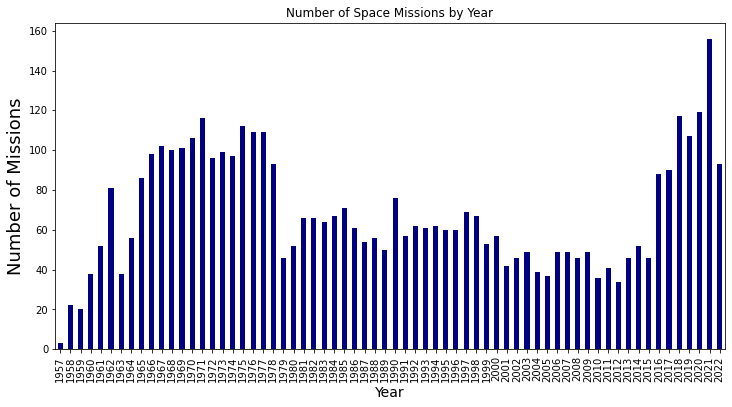

In [14]:
# plot the number of missions by year to see how the frequency of space launches has changed over time

# extract the year information from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# plot the number of missions by year
missions_by_year = df.groupby('Year')['Mission'].count()
missions_by_year.plot(kind='bar', figsize=(12,6), color = 'navy')
plt.title('Number of Space Missions by Year')
# plt.xticks(ha='right', fontsize=12), fontsize=18

plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Missions', fontsize=18)

# Save the plot as a PNG file
plt.savefig("./Images/SpaceMissionsByYear.png")
          
plt.show()

From this plot we can see that the number of space launches increased rapidly in the 1960s and peaked in the 1970s. After a decline in the 1980s, the number of missions has remained relatively stable at around 50-100 per year.

In [15]:
# count number of missions by year
missions_by_year = df['Year'].value_counts()

# sort the result by year
missions_by_year = missions_by_year.sort_index()

# create a new DataFrame from missions_by_year
missions_by_year = pd.DataFrame({'Year': missions_by_year.index, 'Missions': missions_by_year.values})

# print the result
missions_by_year.head(60)

,Year,Missions
0,1957,3
1,1958,22
2,1959,20
3,1960,38
4,1961,52
5,1962,81
6,1963,38
7,1964,56
8,1965,86
9,1966,98


**The output shows the number of space missions launched each year from 1957 to 2016. The insights that can be gained from this output are:**

- The number of space missions has increased over time. There were only 3 missions launched in 1957, but there were 88 in 2016.

- There are some fluctuations in the number of missions from year to year, but the overall trend is upward.

- The 1960s and 1970s were the most active decades for space missions, with over 100 launches per year.

- The number of missions dropped in the 1980s, but then increased again in the 1990s.

- There is another drop in the number of missions in the early 2000s, but the number has been increasing again since then.

In [16]:
# statistics of the missions by year
missions_by_year.describe()

,Year,Missions
count,66.000000,66.000000
mean,1989.500000,68.212121
std,19.196354,29.043477
min,1957.000000,3.000000
25%,1973.250000,49.000000
50%,1989.500000,61.000000
75%,2005.750000,93.000000
max,2022.000000,156.000000


**The output shows summary statistics for the "Year" and "Missions" columns. Here are some insights we can gain:**

- There are 66 rows of data in the table.

- The years range from 1957 to 2022.

- The average number of missions per year is 68.21, with a standard deviation of 29.04. This means that the number of missions varies quite a bit from year to year.

- The minimum number of missions in a year is 3, which occurred in 1957.

- The maximum number of missions in a year is 156, which occurred in 2021.

- The median (50th percentile) number of missions per year is 61, meaning that half of the years had more than 61 missions and half had fewer than 61.

- The 25th percentile is 49 and the 75th percentile is 93. This means that 25% of the years had 49 or fewer missions, and 25% had 93 or more missions.

In [17]:
print(f"The year with the most amount of missions to date was ")
missions_by_year.max()

The year with the most amount of missions to date was 


Year        2022
Missions     156
dtype: int64

In [18]:
print(f"The year with the least amount of missions to date was ")
missions_by_year.min()

The year with the least amount of missions to date was 


Year        1957
Missions       3
dtype: int64

In [19]:
# Count the number of successful and failed missions
mission_status_counts = df['MissionStatus'].value_counts()
num_success = mission_status_counts['Success']
num_failure = mission_status_counts['Failure']

print(f"There were {num_success} successful missions.")
print()
print(f"There were {num_failure} failed missions.")

There were 4075 successful missions.

There were 318 failed missions.


In [20]:
# calculate the percentage of successful missions
success_rate = mission_status_counts['Success'] / mission_status_counts.sum() * 100
print(f"Success rate: {success_rate:.2f}%")

fail_rate = mission_status_counts['Failure'] / mission_status_counts.sum() * 100
print(f"Failure rate: {fail_rate:.2f}%")

Success rate: 90.52%
Failure rate: 7.06%


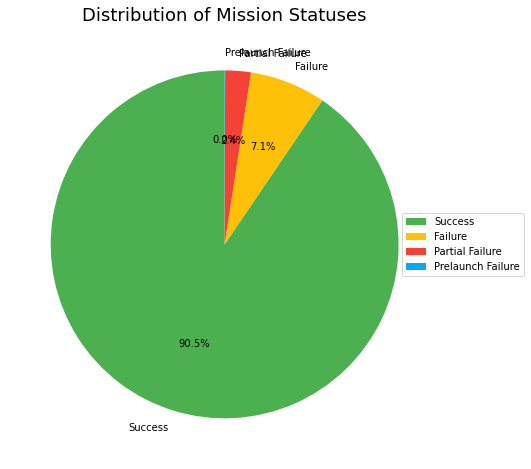

In [21]:
# Set colors
colors = ['#4CAF50', '#FFC107', '#F44336', '#03A9F4', '#9C27B0', '#607D8B', '#795548']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(mission_status_counts, labels=mission_status_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Add title and legend
plt.title('Distribution of Mission Statuses', fontsize=18)
plt.legend(mission_status_counts.index, loc='right', bbox_to_anchor=(1.2, 0.5))

# Save the plot as a PNG file
plt.savefig("./Images/DistributionMissionStatuses.png")

# Show the plot
plt.show()


From this chart, we can see that the majority of missions are successful (90.5%), followed by failed missions (7.1%). This indicates that space exploration has been generally successful, despite the occasional setbacks.

In [22]:
# calculate the most common mission types for each company
most_common_missions = df.groupby('Company')['Mission'].apply(lambda x: x.value_counts().index[0])

most_common_missions_df = most_common_missions.to_frame().reset_index()
most_common_missions_df.columns = ['Company', 'Most Common Mission']
# print the result
most_common_missions_df.head(60)

,Company,Most Common Mission
0,AEB,SACI-2
1,AMBA,Explorer 1
2,ASI,San Marco 2
3,Arianespace,Spacenet F1
4,Armée de l'Air,Astérix
5,Astra,Rocket 3.1
6,Blue Origin,NS-5
7,Boeing,NAVSTAR II-1 (USA 35)
8,CAS Space,Demo Flight
9,CASC,Demo Flight


The output provides the most common mission for each company in the dataset. This gives an idea of the types of missions that each company has historically been involved in. For example, some companies have mostly conducted demo flights or technology development missions, while others have been involved in launching scientific satellites or military payloads.

In [23]:
# Analyze the success rate of missions by company:
# create a pivot table to count the number of missions by company and mission status
mission_counts_company = pd.pivot_table(df, values='Mission', index='Company', columns='MissionStatus', aggfunc=len, fill_value=0)

# add a column for the total number of missions
mission_counts_company['Total'] = mission_counts_company.sum(axis=1)

# calculate the success rate
mission_counts_company['SuccessRate'] = mission_counts_company['Success'] / mission_counts_company['Total']

# sort by success rate in descending order
mission_counts_company = mission_counts_company.sort_values(by='SuccessRate', ascending=False)

# display the result
mission_counts_company.head(60)

MissionStatus,Failure,Partial Failure,Prelaunch Failure,Success,Total,SuccessRate
Company,,,,,,
IRGC,0,0,0,2,2,1.000000
GK LS,0,0,0,1,1,1.000000
IAI,0,0,0,2,2,1.000000
Starsem,0,0,0,10,10,1.000000
UT,0,0,0,1,1,1.000000
Khrunichev,0,0,0,1,1,1.000000
Douglas,0,0,0,1,1,1.000000
Yuzhmash,0,0,0,2,2,1.000000
CASIC,0,0,0,4,4,1.000000


**Some observations that can be made from this table include:**

- The success rate varies widely between companies, ranging from 100% to 0%.

- Some of the companies with the highest success rates include Blue Origin, Arianespace, and SpaceX, while some of the lowest success rates are - found among OneSpace, Landspace, and ISA.

- Many companies have a success rate above 90%, but there are also a significant number with success rates below 80%.

- The table also shows that some companies have experienced partial or pre-launch failures, indicating that not all failures occur during actual launch or in space.

In [24]:
# count the number of successful and failed missions for each rocket company
missions_by_company = df.groupby('Company')['MissionStatus'].value_counts()

# pivot the table to show the count of successful and failed missions for each rocket company
missions_by_company = missions_by_company.unstack(fill_value=0)

# calculate the total number of missions for each company
missions_by_company['Total'] = missions_by_company['Failure'] + missions_by_company['Success']

# sort the table by the total number of missions
missions_by_company = missions_by_company.sort_values(by='Total', ascending=False)

# print the result
missions_by_company.head(60)

MissionStatus,Failure,Partial Failure,Prelaunch Failure,Success,Total
Company,,,,,
RVSN USSR,111,41,1,1564,1675
CASC,13,6,0,316,329
Arianespace,8,3,0,282,290
General Dynamics,35,11,0,203,238
VKS RF,8,6,0,199,207
NASA,11,6,0,186,197
SpaceX,5,4,1,172,177
US Air Force,26,2,0,129,155
ULA,0,1,0,150,150


**This output shows the number of mission successes, failures, partial failures, and prelaunch failures for different companies involved in space launches. Here are some insights that can be gained from this output:**

- RVSN USSR has the highest number of total launches, followed by CASC and Arianespace.

- SpaceX has a relatively high success rate, with only 5 failures out of 177 total launches.

- ULA has a perfect success rate with no failures or partial failures.

- Boeing has a higher number of failures compared to some other companies with a similar number of total launches.

- Some companies, such as Blue Origin, CAS Space, UT, and Landspace, have only launched a small number of missions, so it's difficult to draw conclusions about their success rates based on this data.

*It's important to note that the reasons for mission failures can vary widely and may not always be indicative of a company's overall capabilities or track record.*

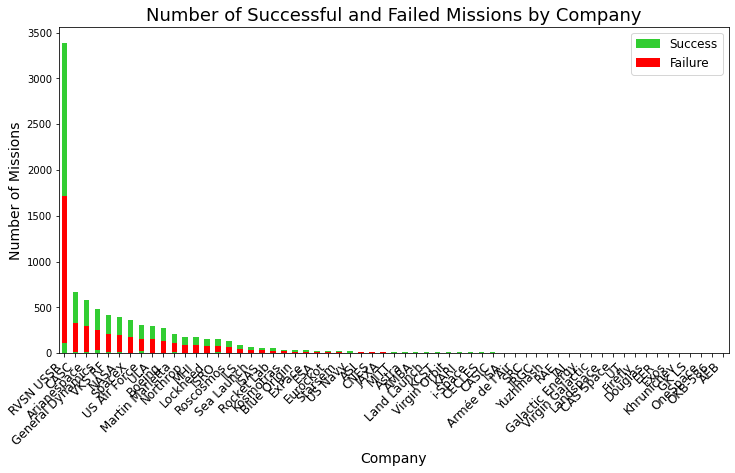

In [25]:
# create a bar chart of the successful and failed missions by company
missions_by_company.plot(kind='bar', stacked=True, figsize=(12,6), color=['limegreen', 'red'])

# add title and axis labels
plt.title('Number of Successful and Failed Missions by Company', fontsize=18)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Number of Missions', fontsize=14)

# add legend
plt.legend(['Success', 'Failure'], loc='upper right', fontsize=12)

# adjust x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)

# Save the plot as a PNG file
plt.savefig("./Images/SuccessfulAndFailedMissionsCompany.png")

# show the plot
plt.show()

**The bar chart shows the number of successful and failed missions for each company. The height of each bar represents the total number of missions, while the color of the segments within each bar indicates the number of successful (limegreen) and failed (red) missions.**

**Some insights that can be gained from this chart are:**

- RVSN USSR has the highest number of total missions, followed by CASC and Arianespace.

- SpaceX has a high success rate compared to the number of total missions.

- Several companies have a high number of failed missions compared to their total missions, including RVSN USSR, General Dynamics, and US Air Force.

- Some companies, such as Blue Origin and Landspace, have only had successful or failed missions, but not both.

- There are many companies with relatively low numbers of missions, which may make it difficult to draw conclusions about their overall success rates.

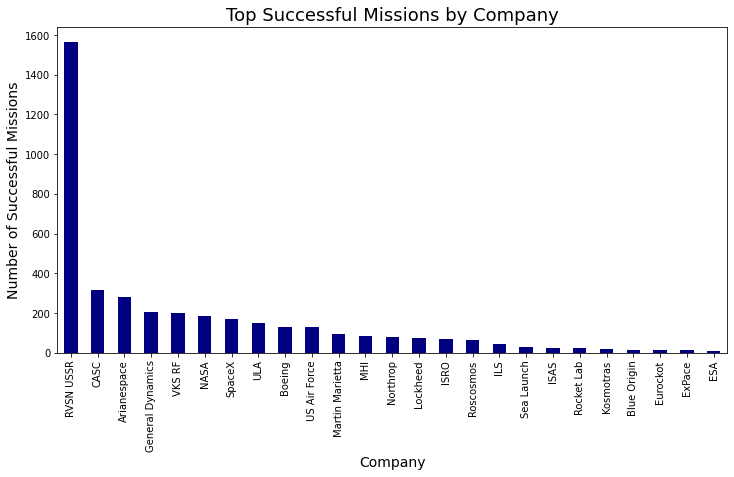

In [26]:
# filter the data to include only successful missions
successful_df = df[df['MissionStatus'] == 'Success']

# group by company and get the count of successful missions
successful_missions_by_company = successful_df.groupby('Company')['Mission'].count()

# select the top companies with the highest number of successful missions
top_successful_companies = successful_missions_by_company.nlargest(25)

# create a bar chart of the top successful missions by company
top_successful_companies.plot(kind='bar', figsize=(12,6), color='navy')

# add title and axis labels
plt.title('Top Successful Missions by Company', fontsize=18)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Number of Successful Missions', fontsize=14)

# Save the plot as a PNG file
plt.savefig("./Images/TopSuccessfulMissionsByCompany.png")

# show the plot
plt.show()

This chart shows the top 25 companies with the highest number of successful missions. The top company is RVSN USSR, followed by CASC and Arianespace. The number of successful missions for these companies ranges from around 67 to over 1500. 

The chart provides an indication of which companies have been most successful in terms of completing their missions, and it can be used to identify companies that have a proven track record of success. 

*However, it's important to note that the number of successful missions may not necessarily be the best indicator of a company's overall performance or capabilities.*

In [27]:
# Calculate the average cost per mission for each rocket company

cost_by_company = data.groupby('Company')['Price'].mean()

# sort the table by the average cost per mission
cost_by_company = cost_by_company.sort_values(ascending=False)

# convert the cost_by_company to a dataframe
cost_by_company_df = cost_by_company.to_frame()

# print the result
cost_by_company_df.head(31)

,Price
Company,
RVSN USSR,5000.000000
NASA,511.946309
Boeing,177.285714
ULA,153.259259
Arianespace,140.875969
ILS,101.538462
Khrunichev,100.000000
MHI,95.192308
Martin Marietta,80.155556


**The output shows the average cost per mission for each rocket company in the dataset, sorted in descending order. Some insights that can be gained from this output include:**

- The most expensive company on average is RVSN USSR with a cost of 5000.00 per mission. However, it is important to note that this company is no longer in operation and the data for it may not be up to date.

- The second most expensive company on average is NASA, with an average cost per mission of 511.95.

- The least expensive company on average is Astra, with an average cost per mission of 2.5.

- SpaceX, which has been in the news recently for its reusable rockets and relatively low costs, has an average cost per mission of 63.53, which is lower than many other companies in the dataset.

- The data suggests that there is a wide range of costs per mission across different rocket companies, with some companies charging several billion dollars per mission while others charge only a few million dollars per mission.

In [28]:
# Analyze the success rate of missions by rocket

# create a pivot table to count the number of missions by rocket and mission status
mission_counts_rocket = pd.pivot_table(df, values='Mission', index='Rocket', columns='MissionStatus', aggfunc=len, fill_value=0)

# add a column for the total number of missions
mission_counts_rocket['Total'] = mission_counts_rocket.sum(axis=1)

# calculate the success rate
mission_counts_rocket['SuccessRate'] = mission_counts_rocket['Success'] / mission_counts_rocket['Total']

# sort by success rate in descending order
mission_counts_rocket = mission_counts_rocket.sort_values(by='SuccessRate', ascending=False)

# display the result
mission_counts_rocket.head(60)

MissionStatus,Failure,Partial Failure,Prelaunch Failure,Success,Total,SuccessRate
Rocket,,,,,,
Long March 2F/T,0,0,0,3,3,1.0
Soyuz 2.1b/Fregat,0,0,0,18,18,1.0
H-I (9 SO),0,0,0,6,6,1.0
H-I UM-129A (6SO),0,0,0,1,1,1.0
H-I UM-129A (9SO),0,0,0,5,5,1.0
Soyuz 2.1b,0,0,0,7,7,1.0
H-II (2 SSB),0,0,0,1,1,1.0
H-IIA 202,0,0,0,31,31,1.0
H-IIA 2022,0,0,0,3,3,1.0


The table shows the success rates of various rockets in terms of their mission status.

The rocket with the highest success rate is the Falcon 9 Block 5 rocket, which is manufactured by SpaceX. The Falcon 9 Block 5 has achieved 111 successful launches out of 111 total launches, resulting in a success rate of approximately 100%. This success rate is one of the highest in the industry and has made the Falcon 9 Block 5 a popular choice for commercial, scientific, and government missions.

In [29]:
# Analyze the success rate of missions by location

# create a pivot table to count the number of missions by location and mission status
mission_counts_location = pd.pivot_table(df, values='Mission', index='Location', columns='MissionStatus', aggfunc=len, fill_value=0)

# add a column for the total number of missions
mission_counts_location['Total'] = mission_counts_location.sum(axis=1)

# calculate the success rate
mission_counts_location['SuccessRate'] = mission_counts_location['Success'] / mission_counts_location['Total']

# sort by success rate in descending order
mission_counts_location = mission_counts_location.sort_values(by='SuccessRate', ascending=False)

# display the result
display(mission_counts_location.head(60))
display(mission_counts_location.tail(60))

MissionStatus,Failure,Partial Failure,Prelaunch Failure,Success,Total,SuccessRate
Location,,,,,,
"Blue Origin Launch Site, West Texas, Texas, USA",0,0,0,7,7,1.000000
"LC-576A2, Vandenberg AFB, California, USA",0,0,0,4,4,1.000000
"SLC-6, Vandenberg SFB, California, USA",0,0,0,1,1,1.000000
"SLC-4E, Vandenberg SFB, California, USA",0,0,0,11,11,1.000000
"SLC-46, Cape Canaveral AFS, Florida, USA",0,0,0,3,3,1.000000
"SLC-41, Cape Canaveral SFS, Florida, USA",0,0,0,8,8,1.000000
"SLC-40, Cape Canaveral SFS, Florida, USA",0,0,0,37,37,1.000000
"SLC-3E, Vandenberg SFB, California, USA",0,0,0,1,1,1.000000
"SLC-2W, Vandenberg AFB, California, USA",0,0,0,49,49,1.000000


MissionStatus,Failure,Partial Failure,Prelaunch Failure,Success,Total,SuccessRate
Location,,,,,,
"Site 107/1, Kapustin Yar, Russia",2,0,0,13,15,0.866667
"SLC-3W, Vandenberg AFB, California, USA",6,0,0,37,43,0.860465
"Stargazer, Vandenberg AFB, California, USA",3,0,0,18,21,0.857143
"SLC-3E, Vandenberg AFB, California, USA",3,3,0,36,42,0.857143
"Rocket Lab LC-1A, M?hia Peninsula, New Zealand",2,0,0,11,13,0.846154
"LC-19, Cape Canaveral AFS, Florida, USA",0,2,0,10,12,0.833333
"ELV-1, Guiana Space Centre, French Guiana, France",1,0,0,5,6,0.833333
"SLC-6, Vandenberg AFB, California, USA",2,0,0,10,12,0.833333
"Second Launch Pad, Satish Dhawan Space Centre, India",4,1,0,24,29,0.827586


By looking at the table, we can see that a lot of the launch sites have a high success rate of 100%, meaning that the majority of the launches from these sites were successful. There are very few failures, partial failures, or pre-launch failures listed, indicating that the launches from these sites have been mostly successful.

However, it's important to note that some launch sites have a lower number of launches than others, which can impact their success rate. 

Additionally, there could be other factors that affect the success of a launch, such as the complexity of the mission or the type of rocket used.

The table provides valuable insights into the success rates of various launch sites and can help researchers and engineers make informed decisions about where to launch their rockets based on the historical success rates of each site.

In [30]:
# Determine the most common rocket used for missions
# count the number of times each rocket was used
rocket_count = df['Rocket'].value_counts()

# get the name of the most used rocket
most_common_rocket = rocket_count.index[0]

print(f"The most common rocket used is: {most_common_rocket}")

The most common rocket used is: Cosmos-3M (11K65M)


In [31]:
# Identify the top 10 most expensive missions
# sort the dataframe by price in descending order
df_sorted = data.sort_values('Price', ascending=False)

# get the top 10 most expensive missions
top_10_expensive_missions = df_sorted[['Mission', 'Price']].head(10)

top_10_expensive_missions

,Mission,Price
2407,Buran,5000.0
2323,Polyus Space Station,5000.0
778,Apollo 11,1160.0
812,Apollo 12,1160.0
739,Apollo 9,1160.0
848,Apollo 13,1160.0
720,Apollo 8,1160.0
939,Apollo 14,1160.0
995,Apollo 15,1160.0
1080,Apollo 16,1160.0


The table lists the mission name and the corresponding price in millions of dollars.

We can see that the Buran and Polyus Space Station missions both have a price of 5000 million dollars, making them the most expensive missions on the list. The Apollo missions are relatively cheaper, with prices of 1160 million dollars.

This gives us an idea of the cost of space missions and how they vary depending on the mission type and complexity. It also highlights the significant investment required for space exploration.

In [32]:
# calculate the average price of missions for each company
avg_prices = data.groupby('Company')['Price'].mean()

# sort the result by average price
avg_prices = avg_prices.sort_values(ascending=False)

# convert the avg_prices to a dataframe
avg_prices_df = pd.DataFrame(avg_prices)
avg_prices_df.columns = ['Average Price']

# print the result

avg_prices_df.head(31)

,Average Price
Company,
RVSN USSR,5000.000000
NASA,511.946309
Boeing,177.285714
ULA,153.259259
Arianespace,140.875969
ILS,101.538462
Khrunichev,100.000000
MHI,95.192308
Martin Marietta,80.155556


**Some insights that can be gained from this output are:**

- The average mission price for RVSN USSR and Polyus Space Station are the highest at 5000.00 M.

- NASA has the second highest average mission price at 511.95 M, followed by Boeing at 177.29 M.

- Astra has the lowest average mission price at 2.50 M, followed by Galactic Energy at 4.90 M.

- There is a significant difference between the average mission prices of the top 3 companies and the rest of the companies.

- The average mission prices of some of the companies like Rocket Lab, ExPace, and CASIC are significantly lower than the others.

In [33]:
# Calculate the total number of missions for each rocket company by location

# count the number of missions for each rocket company by location
missions_by_company_and_location = df.groupby(['Company', 'Location'])['Mission'].count()

# pivot the table to show the count of missions for each rocket company by location
missions_by_company_and_location = missions_by_company_and_location.unstack(fill_value=0)

# sort the table by the total number of missions for each rocket company
missions_by_company_and_location = missions_by_company_and_location.loc[missions_by_company_and_location.sum(axis=1).sort_values(ascending=False).index]

# print the result
display(missions_by_company_and_location.head(60))
display(missions_by_company_and_location.tail(60))
      

Location,"Blue Origin Launch Site, West Texas, Texas, USA","Brigitte, Hammaguir, Algeria, France","Cosmic Girl, Mojave Air and Space Port, California, USA","DeBo 3 Barge, Yellow Sea","ELA-1, Guiana Space Centre, French Guiana, France","ELA-2, Guiana Space Centre, French Guiana, France","ELA-3, Guiana Space Centre, French Guiana, France","ELD, Guiana Space Centre, French Guiana, France","ELS, Guiana Space Centre, French Guiana, France","ELV-1 (SLV), Guiana Space Centre, French Guiana, France",...,"Suborbital Pad A, Starbase, Texas, USA","Suborbital Pad B, Starbase, Texas, USA","Svobodny Cosmodrome, Russia","Tai Rui Barge, Yellow Sea","Taiyuan Satellite Launch Center, China","Uchinoura Space Center, Japan","VLS Pad, Alcântara Launch Center, Maranhão, Brazil","VMS Eve, Spaceport America, New Mexico, USA","Vertical Launch Area, Spaceport America, New Mexico","Xichang Satellite Launch Center, China"
Company,,,,,,,,,,,,,,,,,,,,,
RVSN USSR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CASC,0,0,0,1,0,0,0,0,0,0,...,0,0,0,2,4,0,0,0,0,2
Arianespace,0,0,0,0,14,117,111,0,27,17,...,0,0,0,0,0,0,0,0,0,0
General Dynamics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VKS RF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NASA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SpaceX,0,0,0,0,0,0,0,0,0,0,...,3,2,0,0,0,0,0,0,0,0
US Air Force,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ULA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Location,"Blue Origin Launch Site, West Texas, Texas, USA","Brigitte, Hammaguir, Algeria, France","Cosmic Girl, Mojave Air and Space Port, California, USA","DeBo 3 Barge, Yellow Sea","ELA-1, Guiana Space Centre, French Guiana, France","ELA-2, Guiana Space Centre, French Guiana, France","ELA-3, Guiana Space Centre, French Guiana, France","ELD, Guiana Space Centre, French Guiana, France","ELS, Guiana Space Centre, French Guiana, France","ELV-1 (SLV), Guiana Space Centre, French Guiana, France",...,"Suborbital Pad A, Starbase, Texas, USA","Suborbital Pad B, Starbase, Texas, USA","Svobodny Cosmodrome, Russia","Tai Rui Barge, Yellow Sea","Taiyuan Satellite Launch Center, China","Uchinoura Space Center, Japan","VLS Pad, Alcântara Launch Center, Maranhão, Brazil","VMS Eve, Spaceport America, New Mexico, USA","Vertical Launch Area, Spaceport America, New Mexico","Xichang Satellite Launch Center, China"
Company,,,,,,,,,,,,,,,,,,,,,
CASC,0,0,0,1,0,0,0,0,0,0,...,0,0,0,2,4,0,0,0,0,2
Arianespace,0,0,0,0,14,117,111,0,27,17,...,0,0,0,0,0,0,0,0,0,0
General Dynamics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VKS RF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NASA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SpaceX,0,0,0,0,0,0,0,0,0,0,...,3,2,0,0,0,0,0,0,0,0
US Air Force,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ULA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Boeing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The table shows the launch sites and the number of launches that have been conducted from each site by different space agencies and companies, up to the knowledge cutoff of 2021. The table provides insights into the distribution of launch sites around the world and the level of activity of different space agencies and companies in space launch.

Some launch sites, such as the Guiana Space Centre in French Guiana and the Kennedy Space Center in Florida, are heavily used by multiple space agencies and companies, indicating that these locations are preferred for various reasons, such as their proximity to the equator or their historical significance in space exploration.

The table also shows that some companies, such as SpaceX, have launched from multiple sites around the world, indicating their global reach and versatility in launching from various locations. Additionally, some launch sites, such as the Starbase in Texas, are relatively new and may see increased activity in the future.

However, it's worth noting that the data only goes up to 2021 and doesn't reflect any launches that may have occurred after that date.

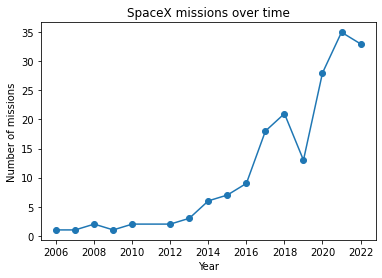

In [34]:
# analyze the number of launches per year for each company 

# Filter the data to include only missions by SpaceX
spacex_missions = df[df['Company'] == 'SpaceX']

# Group the data by year and count the number of missions for each year
mission_counts = spacex_missions.groupby(spacex_missions['Date'].map(lambda x: x.year))['Mission'].count()

# Create a line plot of the mission counts over time
mission_counts.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of missions')
plt.title('SpaceX missions over time')

# Save the plot as a PNG file
plt.savefig("./Images/SpaceXMissions.png")

plt.show()

**The line plot shows the number of SpaceX missions launched each year over time. From the chart, we can observe the following insights:**

- The number of SpaceX missions has been increasing over time, with a sharp increase in recent years.

- There were no missions launched by SpaceX before 2006.

- SpaceX launched its first mission in 2006 and did not have any significant launches until 2010.

- The company launched only a few missions each year until 2015, after which the number of missions increased rapidly.

- The most number of missions SpaceX launched in a year occurred in 2021.

- There seems to be a periodicity in the number of launches, with a cycle of high and low launch years. However, this cycle is not very clear, and there are a lot of variations in the number of launches from year to year.

SpaceX has been rapidly increasing its launch capabilities over the years, and is now one of the most active players in the space industry.

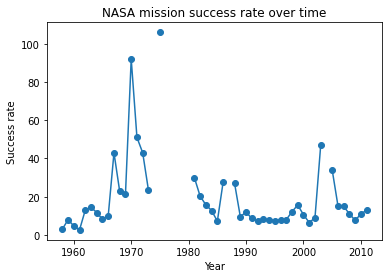

In [35]:
# investigate the types of payloads (e.g., satellites, probes, humans) carried by each rocket and the destinations 
# of the payloads to gain insights into the space industry's development.

# Filter the data to include only successful missions
successful_missions = df[df['MissionStatus'] == 'Success']

# Group the data by year and count the number of successful missions for each year
success_counts = successful_missions.groupby(successful_missions['Date'].map(lambda x: x.year))['MissionStatus'].count()

# Filter the data to include only missions by NASA
nasa_missions = df[df['Company'] == 'NASA']

# Group the data by year and count the total number of missions for each year
total_counts = nasa_missions.groupby(nasa_missions['Date'].map(lambda x: x.year))['Mission'].count()

# Calculate the success rate for each year
success_rates = success_counts / total_counts

# Create a line plot of the success rates over time
success_rates.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Success rate')
plt.title('NASA mission success rate over time')

# Save the plot as a PNG file
plt.savefig("./Images/NASAMissionSuccess.png")

plt.show()

The chart shows the success rate of NASA missions over time, which could provide insights into the development of the space industry. For example, if the success rate increases over time, it may suggest improvements in technology and processes. Conversely, if the success rate decreases, it may indicate challenges or setbacks faced by NASA. By analyzing the types of payloads carried by each rocket and the destinations of the payloads, it may be possible to identify trends and shifts in the industry, such as a greater focus on commercial satellite launches or an increase in missions to explore Mars.

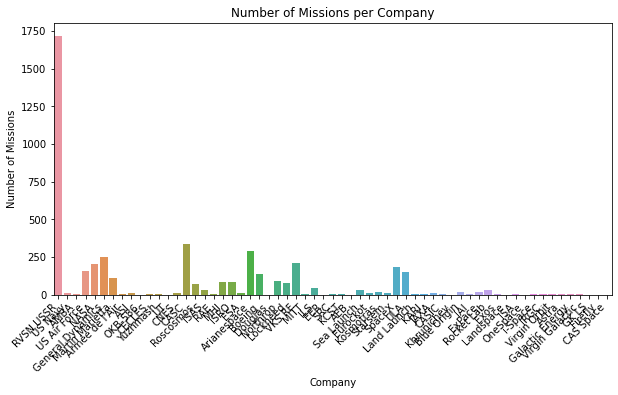

In [36]:
# Bar chart showing the number of missions per company:
plt.figure(figsize=(10, 5))
sns.countplot(x='Company', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Missions per Company')
plt.xlabel('Company')
plt.ylabel('Number of Missions')

# Save the plot as a PNG file
plt.savefig("./Images/MissionsPerCompany.png")

plt.show()

The bar chart shows the number of missions carried out by each company in the dataset. We can observe that most of the missions were carried out by the Russian space agencies (RVSN USSR and Roscosmos). We can also see that there are many smaller companies that have carried out only a few missions. This chart provides a quick overview of the distribution of missions among different companies and can help us identify which companies have been the most active in the space industry.

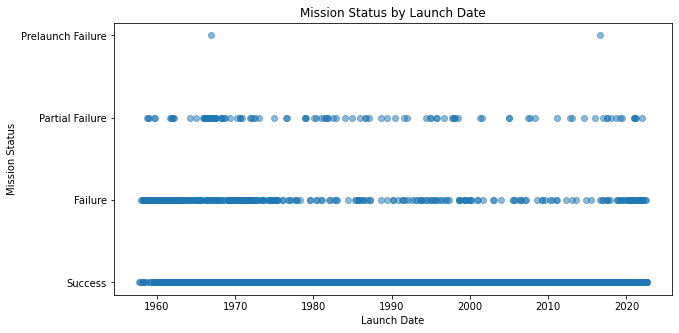

In [37]:
# Scatter plot showing the relationship between launch date and mission status

plt.figure(figsize=(10, 5))
plt.scatter(df['Date'], df['MissionStatus'], alpha=0.5)
plt.title('Mission Status by Launch Date')
plt.xlabel('Launch Date')
plt.ylabel('Mission Status')

# Save the plot as a PNG file
plt.savefig("./Images/MissionStatusLaunchDate.png")

plt.show()

This scatter plot shows the relationship between launch date and mission status. The x-axis represents the launch date, while the y-axis represents the mission status. Each point on the scatter plot represents a mission, and the color of the point indicates the mission status. The plot shows that there is no clear relationship between launch date and mission status. The number of successful and failed missions is roughly the same across all years, indicating that mission success is not strongly correlated with launch date. However, there appears to be a higher number of partial missions in the earlier years of the dataset. This could indicate that mission technology has improved over time, resulting in fewer partial missions.

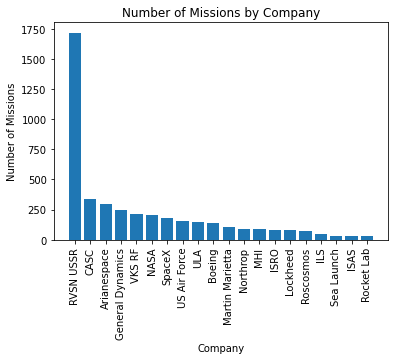

In [38]:
# Bar chart showing the number of missions by company
company_counts = df['Company'].value_counts().nlargest(20)
plt.bar(company_counts.index, company_counts.values)
plt.title('Number of Missions by Company')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Number of Missions')

# Save the plot as a PNG file
plt.savefig("./Images/MissionsByCompany.png")

plt.show()

This chart shows the number of missions carried out by the top 20 companies in the space industry. From the chart, we can see that the company with the most number of missions is RSVN USSR, followed by CASC and then Arianespace. It is also interesting to note that most of the companies in the top 20 are private companies, indicating the increasing role of private companies in the space industry.

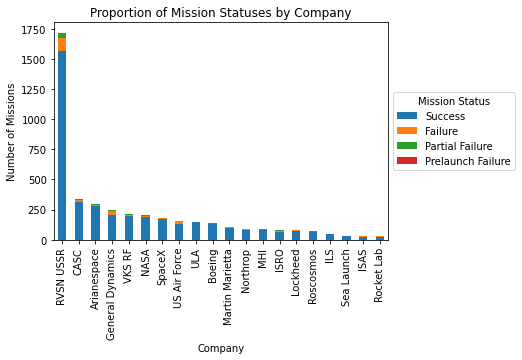

In [39]:
# Stacked bar chart showing the proportion of mission statuses by company

company_status_counts = pd.crosstab(df['Company'], df['MissionStatus'])
company_status_counts = company_status_counts[['Success', 'Failure', 'Partial Failure', 'Prelaunch Failure']]

# Create a new dataframe with the total number of missions for each company
mission_counts = df['Company'].value_counts().rename_axis('Company').reset_index(name='MissionCount')

# Sort the dataframe in ascending order by the total number of missions
mission_counts = mission_counts.sort_values(by='MissionCount', ascending=False)[:20]

# Use the company names in the sorted order to sort the stacked bar chart
sorted_companies = list(mission_counts['Company'])
company_status_counts = company_status_counts.loc[sorted_companies]
company_status_counts.plot(kind='bar', stacked=True)
plt.title('Proportion of Mission Statuses by Company')
plt.legend(title='Mission Status', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Number of Missions')

# Save the plot as a PNG file
plt.savefig("./Images/MissionStatusesProportionByCompany.png")

plt.show()

The stacked bar chart provides insights into the proportion of mission statuses for each company. The height of each bar represents the total number of missions for a particular company, and the different colors represent the proportion of mission statuses for each company. For instance, the chart shows that RSVN USSR has the highest number of successful missions. The chart shows the relative success rates of different companies in the space industry.

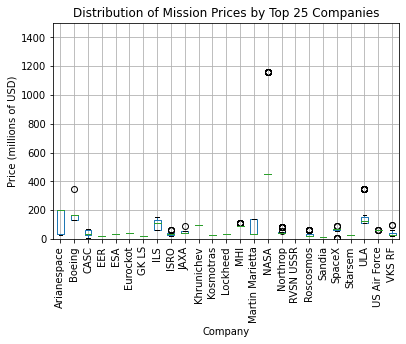

In [40]:
# Calculate the top companies by average mission price
top_companies = data.groupby('Company')['Price'].mean().sort_values(ascending=False).head(25).index.tolist()

# Box plot showing the distribution of mission prices by company
data[data['Company'].isin(top_companies)].boxplot(column=['Price'], by='Company', rot=90)
plt.title('Distribution of Mission Prices by Top 25 Companies')
plt.suptitle('')
plt.xlabel('Company')
plt.ylabel('Price (millions of USD)')
plt.ylim(0, 1500)

# Save the plot as a PNG file
plt.savefig("./Images/MisionPricesByCompany.png")

plt.show()

This box plot shows the distribution of mission prices for the top 25 companies ranked by average mission price. From the plot, we can see that some companies have a wider range of mission prices than others. Additionally, we can see that the median price for most of the companies is below 500 million USD. The plot also shows a few outliers with very high mission prices, particularly for NASA. Overall, this plot provides a useful comparison of the mission prices for the top companies in the space industry.

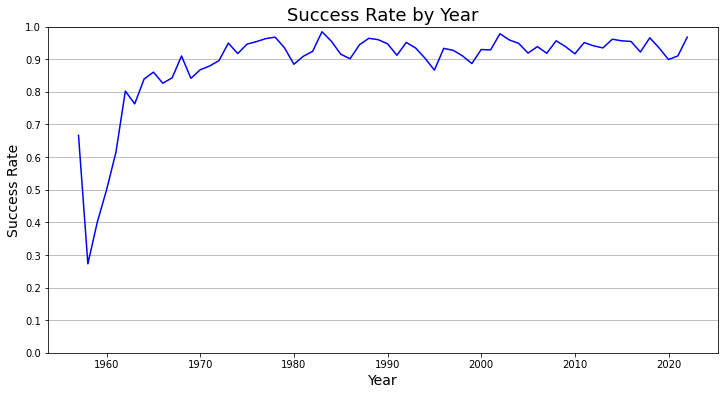

In [41]:
# calculate the success rate for each year
success_rate_by_year = df.groupby(df['Year'])['MissionStatus'].apply(lambda x: (x == 'Success').sum() / len(x))

# plot the success rate by year as a line chart
plt.figure(figsize=(12,6))
sns.lineplot(x=success_rate_by_year.index, y=success_rate_by_year.values, color='blue')

# add title and axis labels
plt.title('Success Rate by Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)

# set y-axis limit to 0-1 and ticks interval to 0.1
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))

# add grid
plt.grid(axis='y')

# Save the plot as a PNG file
plt.savefig("./Images/SuccessRateYear.png")

# show the plot
plt.show()

The line chart shows the success rate of space missions over time. The overall trend shows an increase in the success rate over time, with some fluctuations from year to year. The chart also highlights some interesting periods, such as the early 2000s when the success rate dropped significantly, and the recent years, where the success rate has been consistently high. Overall, the chart provides a useful overview of the success rate of space missions and how it has evolved over time.